## Assignment Random Forest Company Data

Random Forest
 
Assignment


About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 


 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the 

shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural 

location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 


Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales (we will first convert it in 

categorical variable) & all other variable will be independent in the analysis.  


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
Data=pd.read_csv("Company_Data.csv")

In [3]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
Data.iloc[174,:]

Sales             0.0
CompPrice         139
Income             24
Advertising         0
Population        358
Price             185
ShelveLoc      Medium
Age                79
Education          15
Urban              No
US                 No
Name: 174, dtype: object

### EDA

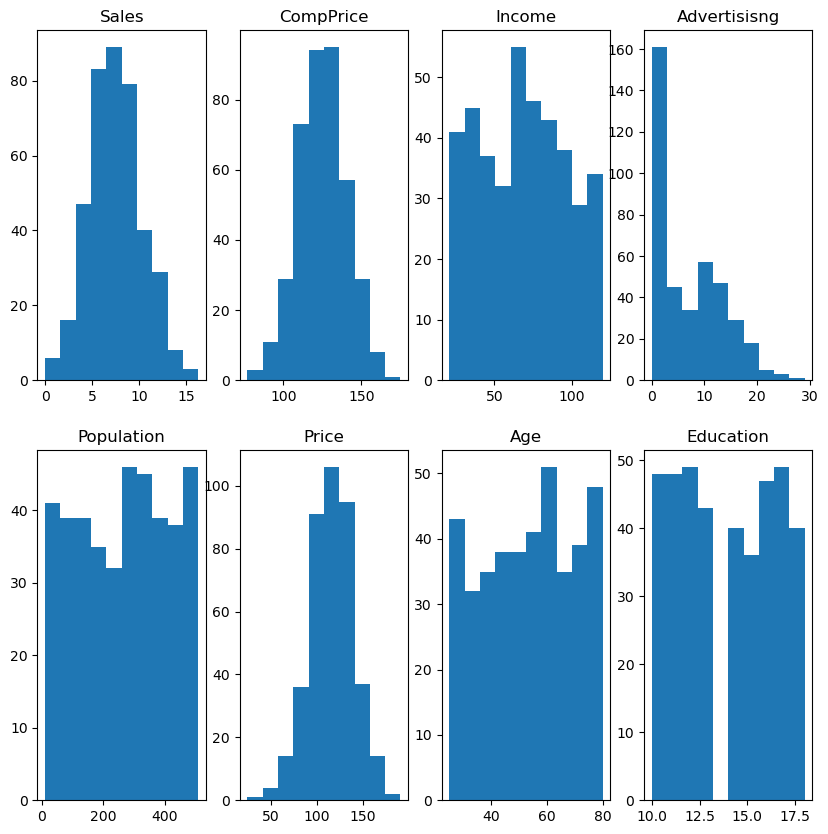

In [7]:
fig,axs=plt.subplots(2,4,figsize=(10,10))
axs[0][0].hist(Data["Sales"])
axs[0][0].set_title("Sales")
axs[0][1].hist(Data["CompPrice"])
axs[0][1].set_title("CompPrice")
axs[0][2].hist((Data["Income"]))
axs[0][2].set_title("Income")
axs[0][3].hist((Data["Advertising"]))
axs[0][3].set_title("Advertisisng")
axs[1][0].hist(Data["Population"])
axs[1][0].set_title("Population")
axs[1][1].hist(Data["Price"])
axs[1][1].set_title("Price")
axs[1][2].hist(Data["Age"])
axs[1][2].set_title("Age")
axs[1][3].hist(Data["Education"])
axs[1][3].set_title("Education")
plt.show()

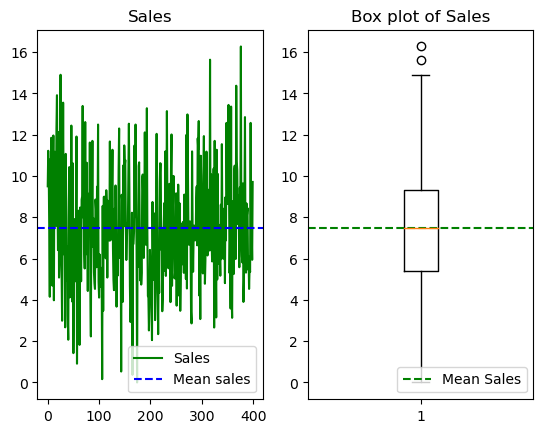

In [8]:
fig,axs=plt.subplots(1,2)
axs[0].plot(Data["Sales"],label="Sales",color='green')
axs[0].axhline(Data["Sales"].mean(),color='b',linestyle="--",label="Mean sales")
axs[0].set_title("Sales")
axs[0].legend(loc="lower right")
axs[1].boxplot(Data["Sales"])
axs[1].axhline(Data["Sales"].mean(),color='g',linestyle="--",label="Mean Sales")
axs[1].set_title("Box plot of Sales")
axs[1].legend(loc="lower right")

In [9]:
stats.median(Data["Sales"])

7.49

### LABELLING THE SALES TO 3 CATEGORIES

###### Let us make category of sales as per Box plot distribution of Quantiles
###### below 1st Quartile====Category LOW
###### Within Inter Quartile====Category GOOD
###### Above 3rd Quartile====Category EXCELLENT

In [10]:
Data["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [11]:
Data["Sales"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [12]:
Data["Sales"]=pd.cut(Data["Sales"],bins=[0.000,5.39,9.32,16.27],
                     labels=["Low","Good","Excellent"])

In [13]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Excellent,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Excellent,111,48,16,260,83,Good,65,10,Yes,Yes
2,Excellent,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Good,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Excellent,138,108,17,203,128,Good,33,14,Yes,Yes
396,Good,139,23,3,37,120,Medium,55,11,No,Yes
397,Good,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Good,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
Data[Data["Sales"].isnull()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,NaN,139,24,0,358,185,Medium,79,15,No,No


In [15]:
Data.iloc[174,0]="Low"

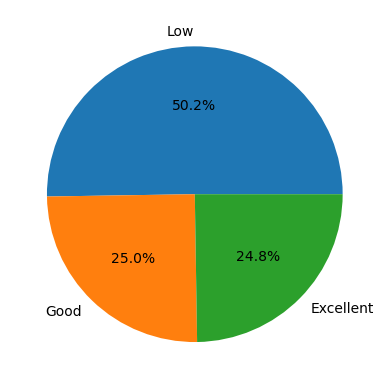

In [16]:
plt.pie(Data["Sales"].value_counts(),labels=["Low","Good","Excellent"],autopct='%1.1f%%')
plt.show()

### Assigning Dummy variables to Shelveloc,Urban,US

In [17]:
Data=pd.get_dummies(Data,columns=["ShelveLoc","Urban","US"])

### Label Encoding for each categories is Sales Feature

In [18]:
Data["Sales"]=LabelEncoder().fit_transform(Data["Sales"])

In [19]:
Data["Sales"].unique()

array([0, 1, 2])

In [20]:
Y=Data["Sales"]
X=Data.iloc[:,1:]

In [21]:
Y.unique()

array([0, 1, 2])

## Model with Train Test Sampling

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


### Hyper Parameter tuning for Randomforest using Grid Search CV

In [24]:
est=RandomForestClassifier(max_depth=10,min_samples_split=2,random_state=42)
params={"criterion":('gini','entropy'),"n_estimators":(1,100,5),"max_features": ("auto", "sqrt", "log2")}

In [25]:
gcv=GridSearchCV(estimator=est,param_grid=params,cv=5)

## Model Building with train test split method

In [26]:
modelgcv=gcv.fit(X_train,Y_train)

In [27]:
results = gcv.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100} Score: 0.634375
Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100} Score: 0.634375
Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100} Score: 0.634375
Parameters: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100} Score: 0.621875
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100} Score: 0.621875
Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100} Score: 0.621875
Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 5} Score: 0.58125
Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 5} Score: 0.58125
Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 5} Score: 0.58125
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 5} Score: 0.56875
Parameters: {'criterion': 'gini', 'max_featu

In [28]:
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [29]:
gcv.best_score_

0.634375

## Final model as per Grid Search Cv

In [30]:
Model=RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_split=6
                             ,n_estimators=100,max_features='auto',random_state=42)

In [31]:
Model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=6,
                       random_state=42)

##### Training Accuracy

In [32]:
print(accuracy_score(Y_train,Model.predict(X_train)))

0.803125


In [33]:
print(classification_report(Y_train,Model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80        76
           1       0.73      0.97      0.83       161
           2       0.96      0.58      0.72        83

    accuracy                           0.80       320
   macro avg       0.88      0.75      0.79       320
weighted avg       0.84      0.80      0.80       320



##### Testing Accuracy

In [34]:
print(accuracy_score(Y_test,Model.predict(X_test)))

0.7125


In [35]:
print(classification_report(Y_test,Model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.68      0.85      0.76        40
           2       0.67      0.47      0.55        17

    accuracy                           0.71        80
   macro avg       0.73      0.66      0.68        80
weighted avg       0.72      0.71      0.71        80



# Model with KFOLD validation technique

In [36]:
kfold = KFold(n_splits=10,shuffle=True, random_state=42)

In [37]:
Modelkfold=RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_split=6
                             ,n_estimators=100,max_features='auto',random_state=42)

In [38]:
results = cross_val_score(Modelkfold, X, Y, cv=kfold)
print(results.mean())

0.6525


In [39]:
y_pred = cross_val_predict(Modelkfold, X, Y, cv=kfold)

# Get classification report for predicted target values
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62        99
           1       0.61      0.84      0.71       201
           2       0.71      0.40      0.51       100

    accuracy                           0.65       400
   macro avg       0.69      0.59      0.61       400
weighted avg       0.67      0.65      0.64       400



# Conclusion 

When using Kfold validation each class accuracy as well as total accuracy improved than train_test_split method

Random forest shows better accuracy than Decision tree.